# Setting Up Analysis

In [2]:
import os
import json

score_lst_trustworthiness = 0
score_lst_alliance = 0
counter = 0

player_wins = [0, 0, 0, 0, 0]
trustworthiness = []
alliance_lst = []

trustworthiness_player = [[], [], [], [], []]

trustworthiness_player_all = [[], [], [], [], []]


data_files = os.listdir('server/data')
for file_ in data_files:
    index = int(file_[5:].split(".")[0])
    if index % 2 == 0:
        with open(f"server/data/{file_}") as f:
            # load file
            data = json.load(f)
            last_key = list(data.keys())[-1]
            # get index of player who won
            player_won = int(data[last_key].split(" ")[1]) - 1
            player_str = "player" + str(player_won)
            
            # for calculating mean
            score_lst_trustworthiness += data[player_str]["trustworthiness"]
            trustworthiness.append(data[player_str]["trustworthiness"])
            
            # for calculating mean
            score_lst_alliance += data[player_str]["likelihood_of_alliance"]
            alliance_lst.append(data[player_str]["likelihood_of_alliance"])
            
            trustworthiness_player[player_won].append(data[player_str]["trustworthiness"])
              
            player_wins[player_won] += 1
            counter += 1


            # for all players, not just winners
            for i in range(5):
                player_str_all = "player" + str(i)
                trustworthiness_player_all[i].append(data[player_str_all]["trustworthiness"]) 




# Mean Calculation



In [3]:
print(f"Mean trustworthiness for winners was {score_lst_trustworthiness / counter}")
print(f"Mean alliance for winners was {score_lst_alliance / counter}")


Mean trustworthiness for winners was 0.6088248603838843
Mean alliance for winners was 0.6889022415762365


# Median Calculation

In [4]:
def calc_median(lst):
    median = 0
    sorted_lst = sorted(lst)
    if(len(sorted_lst) % 2 == 0):
        index_mid1 = int((len(sorted_lst) / 2) - 1)
        index_mid2 = int(len(sorted_lst) / 2)
        median = (sorted_lst[index_mid1] + sorted_lst[index_mid2]) / 2
        return median

    index_mid = int(len(sorted_lst) / 2)
    median = sorted_lst[index_mid]
    return median
    

print(f"Median Trustworthiness Score is: {calc_median(trustworthiness)}")
print(f"Median Likelihood of Alliance Score is: {calc_median(alliance_lst)}")

Median Trustworthiness Score is: 0.6070780876077502
Median Likelihood of Alliance Score is: 0.7506901206304046


# Mode Calculation

In [5]:
# get maximum value from frequency list
print(f"The player who won the most was Player {player_wins.index(max(player_wins)) + 1}")

The player who won the most was Player 5


# 

# Frequency Plot

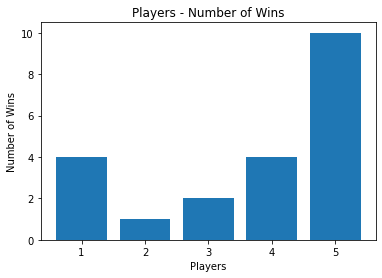

5


In [6]:
# plot frequencies
import matplotlib.pyplot as plt
# plt.bar([1, 2, 3, 4, 5], [i/sum(player_wins) for i in player_wins])
plt.bar([1, 2, 3, 4, 5], [i for i in player_wins])
plt.xlabel("Players")
plt.ylabel("Number of Wins")
plt.title("Players - Number of Wins")
plt.show()

print(player_wins.index(max(player_wins)) + 1)

In [7]:
# plt.bar(range(len(trustworthiness)), trustworthiness)
# plt.show()



Text(0.5, 1.0, 'Mean Trustworthiness Score')

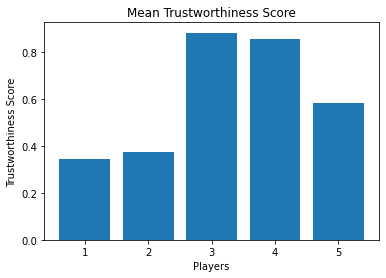

In [8]:
avg_arr = []
for arr in trustworthiness_player:
    avg_arr.append(sum(arr)/len(arr))

plt.bar([1,2,3,4,5], avg_arr)
plt.xlabel("Players")
plt.ylabel("Trustworthiness Score")
plt.title("Mean Trustworthiness Score")

In [9]:
# Bayes' Theorem Analysis

def p_player(player_num):
    return player_wins[player_num - 1] / sum(player_wins)

def p_trust_given_w(player_num):
    counter = 0
    arr = trustworthiness_player[player_num - 1]
    for i in arr:
        if i > 0.7:
            counter += 1
    return counter / len(arr)

def p_win(player_num):
    return player_wins[player_num-1] / sum(player_wins)


def trust_greater(player_num):
    counter = 0
    arr = trustworthiness_player_all[player_num - 1]
    for i in arr:
        if i > 0.7:
            counter += 1
    return counter / len(arr)

def w_given_t(player_num):
    return (p_trust_given_w(player_num) * p_win(player_num) ) /trust_greater(player_num)

Text(0.5, 1.0, 'Players - P(Win | Trustworthiness > 0.7)')

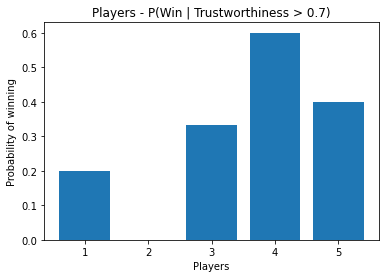

In [12]:
plotting_arr = [w_given_t(i) for i in range(1,6)]
plt.bar(range(1,6), plotting_arr)
plt.xlabel("Players")
plt.ylabel("Probability of winning")

plt.title("Players - P(Win | Trustworthiness > 0.7)")

# Median Calculation $-$ For Bayes Theorem

In [11]:
median = (calc_median(plotting_arr))
# sum(plotting_arr) / len(plotting_arr)
print(f"Median P(win|trust > 0.7) is {median}")

Median P(win|trust > 0.7) is 0.3333333333333333
